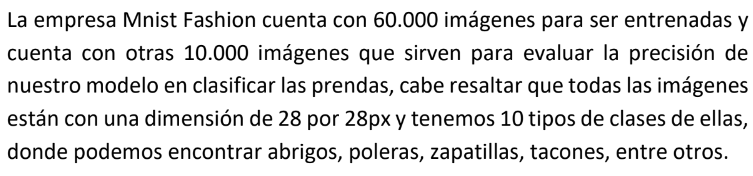

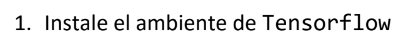

In [1]:
pip install tensorflow

                                              0.0/272.9 MB ? eta -:--:--
                                             0.7/272.9 MB 23.8 MB/s eta 0:00:12
                                             1.8/272.9 MB 27.6 MB/s eta 0:00:10
                                             2.1/272.9 MB 19.4 MB/s eta 0:00:14
                                             2.2/272.9 MB 13.0 MB/s eta 0:00:21
                                             4.0/272.9 MB 18.4 MB/s eta 0:00:15
                                             5.0/272.9 MB 19.9 MB/s eta 0:00:14
                                             5.5/272.9 MB 17.6 MB/s eta 0:00:16
                                             5.5/272.9 MB 17.6 MB/s eta 0:00:16
                                             5.5/272.9 MB 17.6 MB/s eta 0:00:16
                                             5.5/272.9 MB 17.6 MB/s eta 0:00:16
                                             5.5/272.9 MB 17.6 MB/s eta 0:00:16
                                             5.

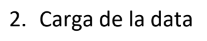

In [162]:
from sklearn.datasets import load_digits 
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import random

In [18]:
# cargar la data
fashion_mnist = keras.datasets.fashion_mnist

In [21]:
datos = fashion_mnist.load_data()

In [26]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

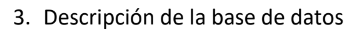

In [29]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# 60000 imagenes de 28x28 pixeles

In [32]:
clases = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo','Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

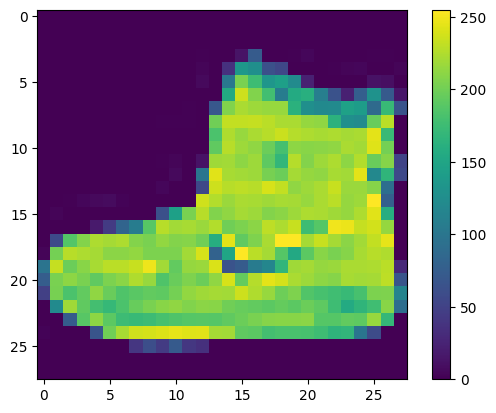

In [45]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

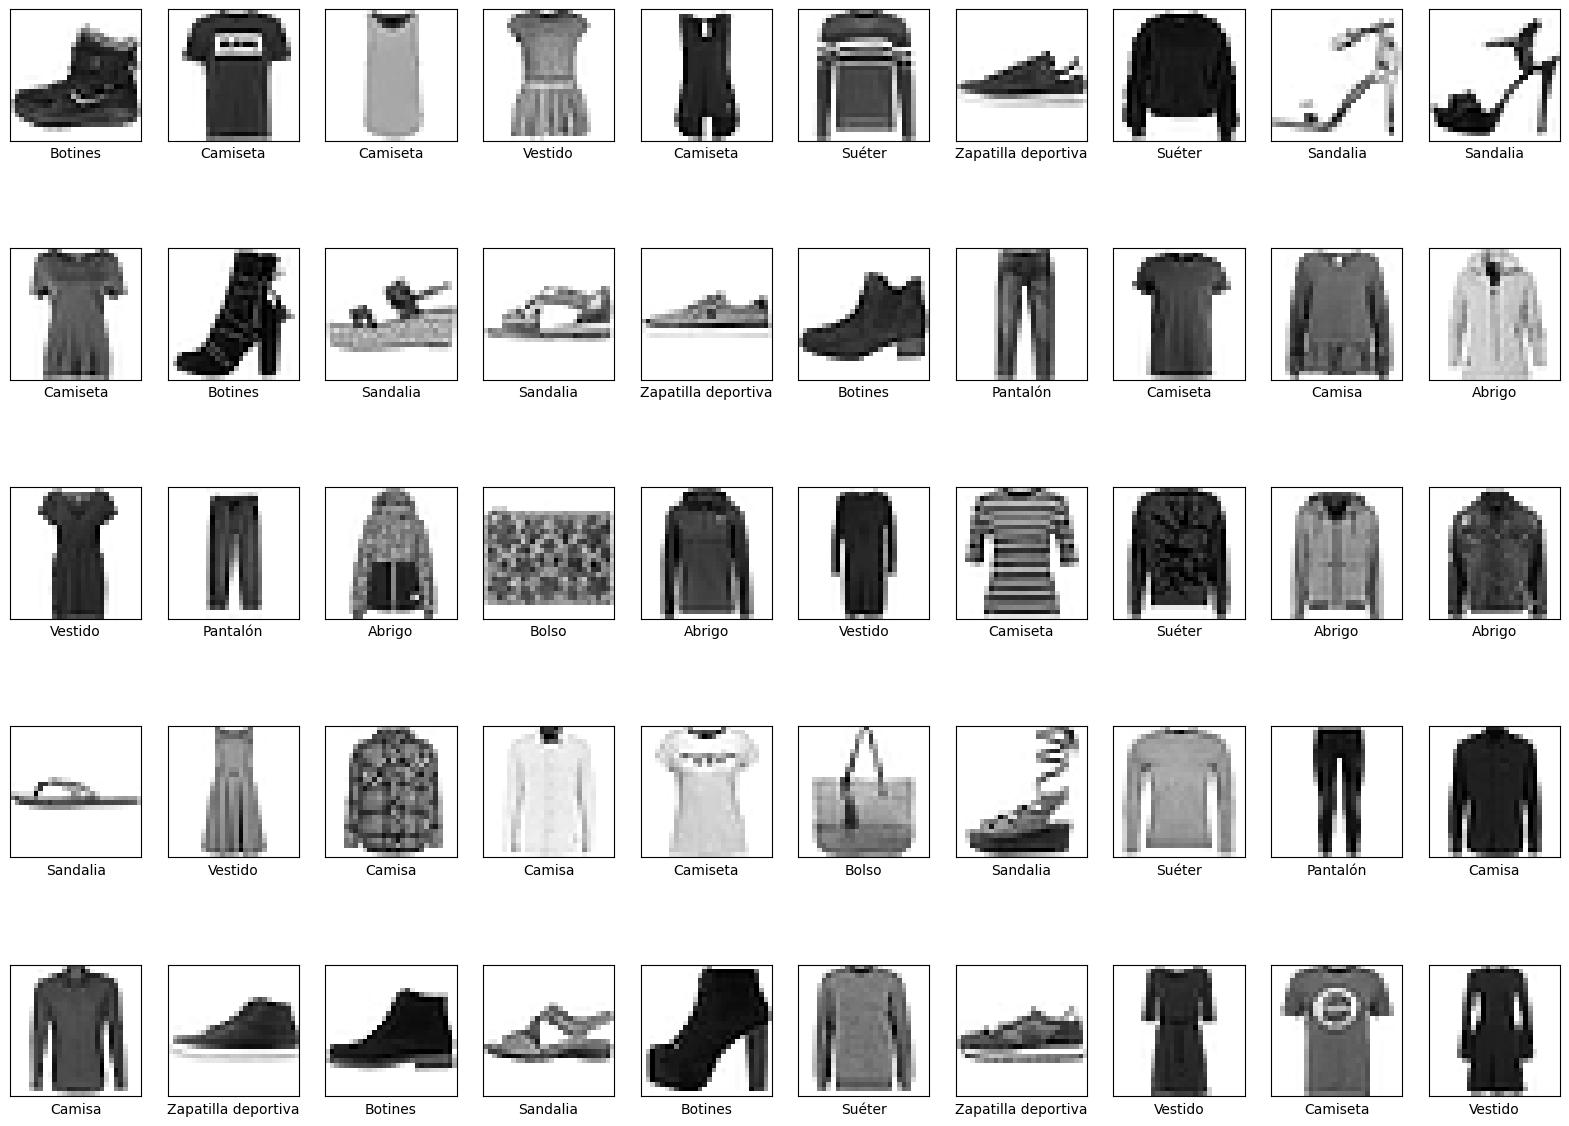

In [49]:
plt.figure(figsize=(20,15))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(clases[train_labels[i]])
plt.show()

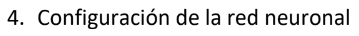

In [51]:
red_neuronal = keras.Sequential([
 keras.layers.Flatten(input_shape=(28,28)),
 keras.layers.Dense(150, activation=tf.nn.relu),
 keras.layers.Dense(10, activation=tf.nn.softmax)
])

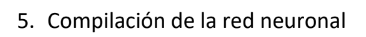

In [53]:
red_neuronal.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
red_neuronal.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 10)                1510      
                                                                 
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


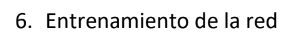

In [144]:
tamano_bach = round(len(train_images)*0.1)
tamano_bach

6000

In [153]:
red_neuronal.fit(train_images,train_labels,epochs=15,batch_size=tamano_bach)

Epoch 1/15
10/10 [==============================] - 0s 26ms/step - loss: 0.3656 - accuracy: 0.8699
Epoch 2/15
10/10 [==============================] - 0s 24ms/step - loss: 0.3645 - accuracy: 0.8700
Epoch 3/15
10/10 [==============================] - 0s 26ms/step - loss: 0.3637 - accuracy: 0.8706
Epoch 4/15
10/10 [==============================] - 0s 27ms/step - loss: 0.3630 - accuracy: 0.8703
Epoch 5/15
10/10 [==============================] - 0s 23ms/step - loss: 0.3621 - accuracy: 0.8707
Epoch 6/15
10/10 [==============================] - 0s 22ms/step - loss: 0.3615 - accuracy: 0.8705
Epoch 7/15
10/10 [==============================] - 0s 21ms/step - loss: 0.3609 - accuracy: 0.8705
Epoch 8/15
10/10 [==============================] - 0s 21ms/step - loss: 0.3603 - accuracy: 0.8711
Epoch 9/15
10/10 [==============================] - 0s 22ms/step - loss: 0.3599 - accuracy: 0.8707
Epoch 10/15
10/10 [==============================] - 0s 21ms/step - loss: 0.3595 - accuracy: 0.8709
Epoch 11/

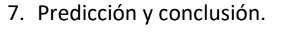

In [154]:
variable = 15

In [155]:
pred = red_neuronal.predict(test_images)
img_predict = pred[variable]

313/313 [==============================] - 0s 1ms/step


In [156]:
print(img_predict)

[1.9019226e-06 9.9591160e-01 1.5177743e-06 4.0298947e-03 5.4925968e-05
 1.3213836e-37 2.0708895e-07 0.0000000e+00 1.3195336e-09 0.0000000e+00]


In [157]:
np.argmax(img_predict)

1

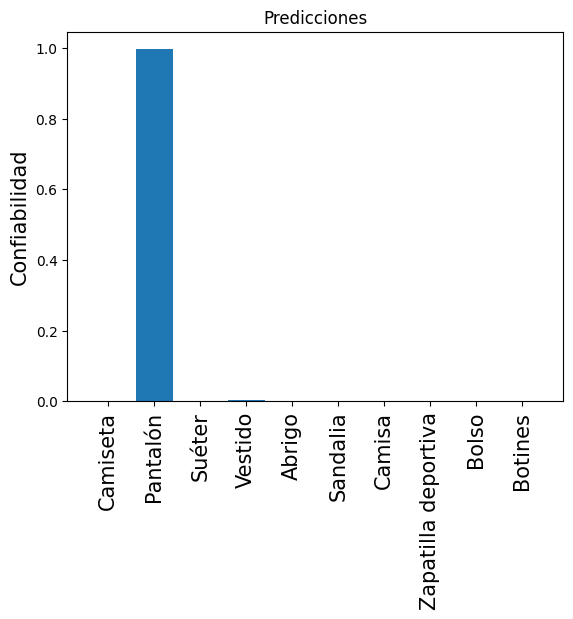

In [158]:
index = np.arange(len(clases))
plt.bar(index, img_predict)
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index, clases, fontsize=15, rotation=90)
plt.title('Predicciones')
plt.show()

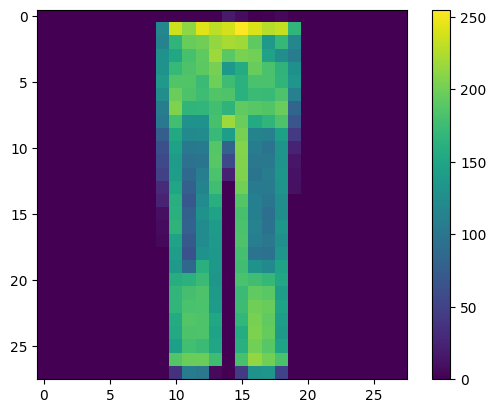

In [159]:
plt.figure()
plt.imshow(test_images[variable])
plt.colorbar()
plt.grid(False)
plt.show()

In [171]:
pred.shape

(10000, 10)

In [169]:
numeros = random.sample(range(0, 10000), 10)
numeros

[1644, 2994, 1796, 2898, 4049, 9429, 9234, 9116, 7937, 3997]

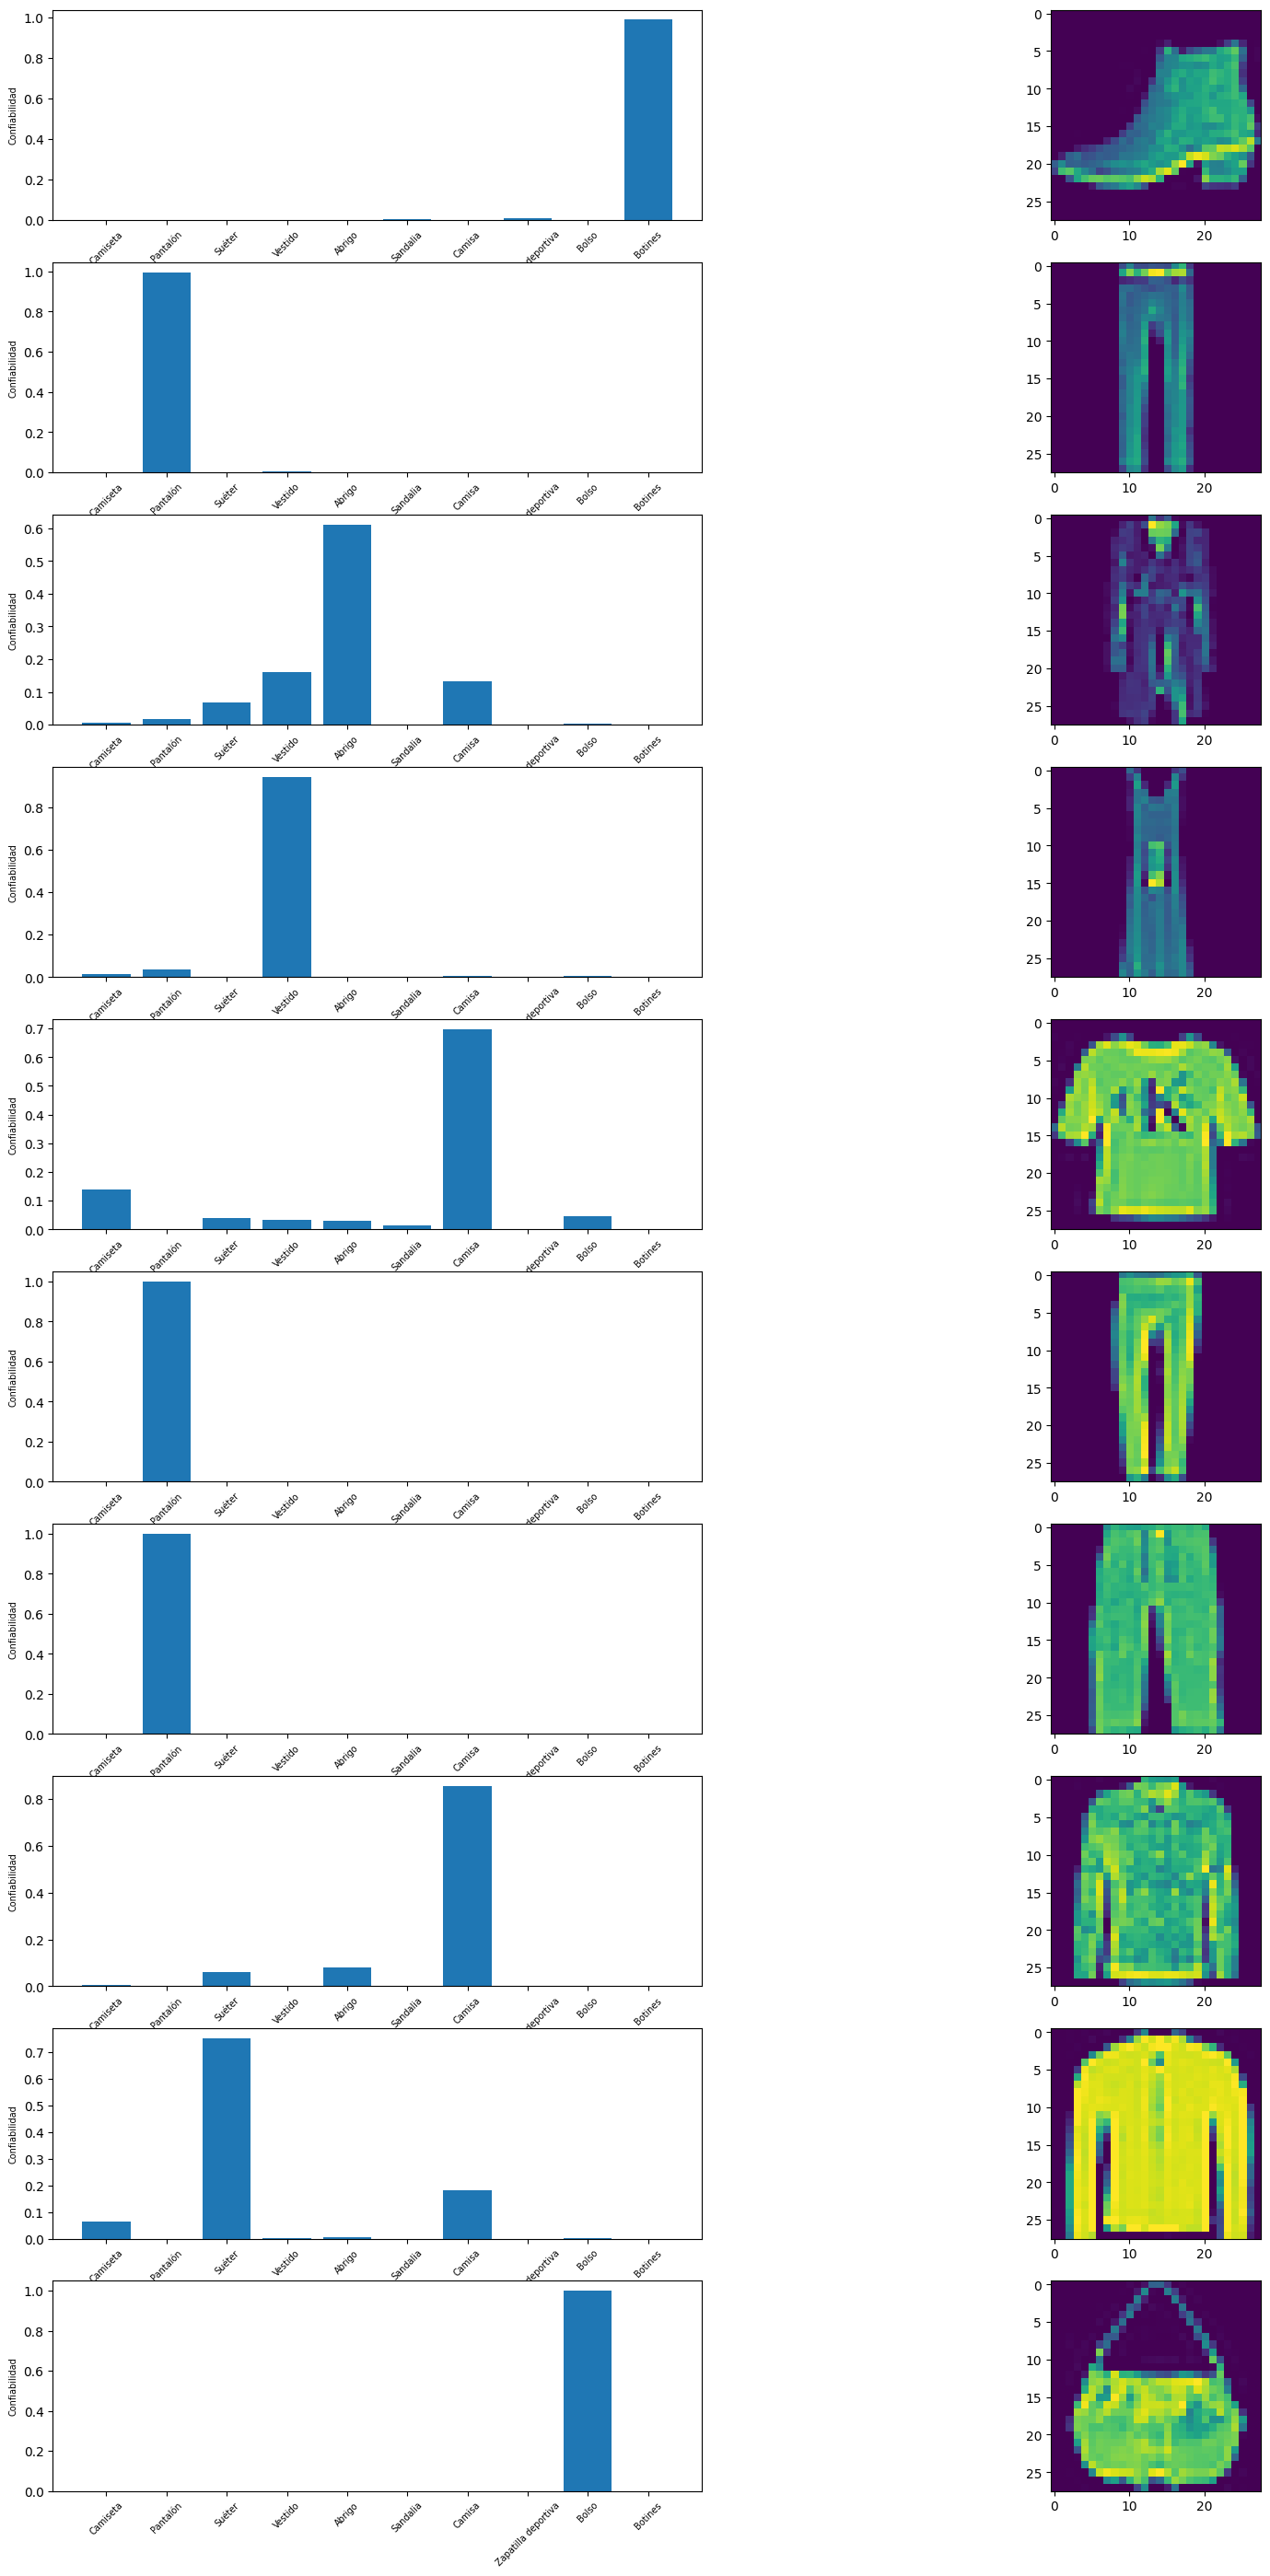

In [175]:
# lista de 10 numeros aleatorios entre 0 y 60000
numeros = random.sample(range(0, 10000), 10)
numeros
fig ,axs = plt.subplots(10,2, figsize=(20,35))

contador = 0
for i in numeros:
    img_predict = pred[i]
    index = np.arange(len(clases))
    axs[contador,0].bar(index, img_predict)

    axs[contador,0].set_ylabel('Confiabilidad', fontsize=7,rotation=90)
    axs[contador,0].set_xticks(index, clases, fontsize=7, rotation=45)

    axs[contador,1].imshow(test_images[i])
    contador += 1 # para que vaya cambiando de fila en la matriz de subplots
plt.show() 


# Este ciclo for i hace una selección aleatoria de 10 imágenes de test_images y las muestra junto con la predicción de la red neuronal.

In [ ]:
# Como se puede observar en la figura generada hay imagenes que la red neuronal puede clasificar con casi un 100% de confiabilidad,
#  mientras que otras no tanto ya que les asigna una confiabilidad baja para otras clases. Esto se debe a que la red neuronal no es 
# perfecta y puede cometer errores en la clasificación. Pero a pesar de eso, es capaz de asignar la clase que tenga mayor confiabilidad, 
# por lo que clasifica correctamente la mayoria de las imagenes.